In [30]:
import torch 
import torchvision 
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim 

import torch.nn as nn
#load datatset

train_set = torchvision.datasets.FashionMNIST(root = './data/FashionMNIST', download = True,
                                              train = True, transform = transforms.Compose([transforms.ToTensor(),]))

test_set = torchvision.datasets.FashionMNIST(root = './data/FashionMNIST', download=True,
                                             train=False, transform = transforms.Compose([transforms.ToTensor()]))



In [31]:
test_set

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./data/FashionMNIST
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )

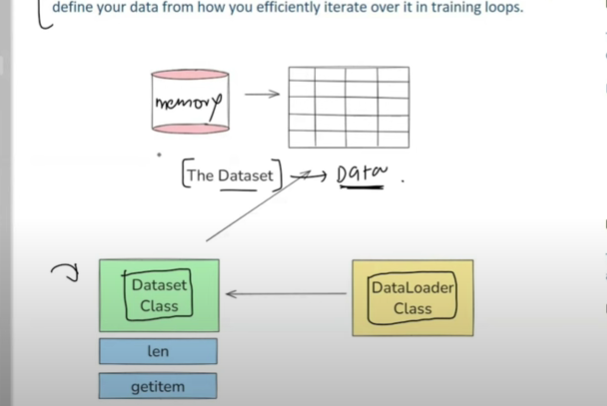

In [32]:
train_loader = DataLoader(train_set,batch_size = 200,shuffle = True)
test_loader = DataLoader(test_set, batch_size =60000)

images, labels = next(iter(train_loader))

#used to create a grid of images
grid = torchvision.utils.make_grid(images,nrow=20)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)),cmap='gray')

In [33]:
train_loader

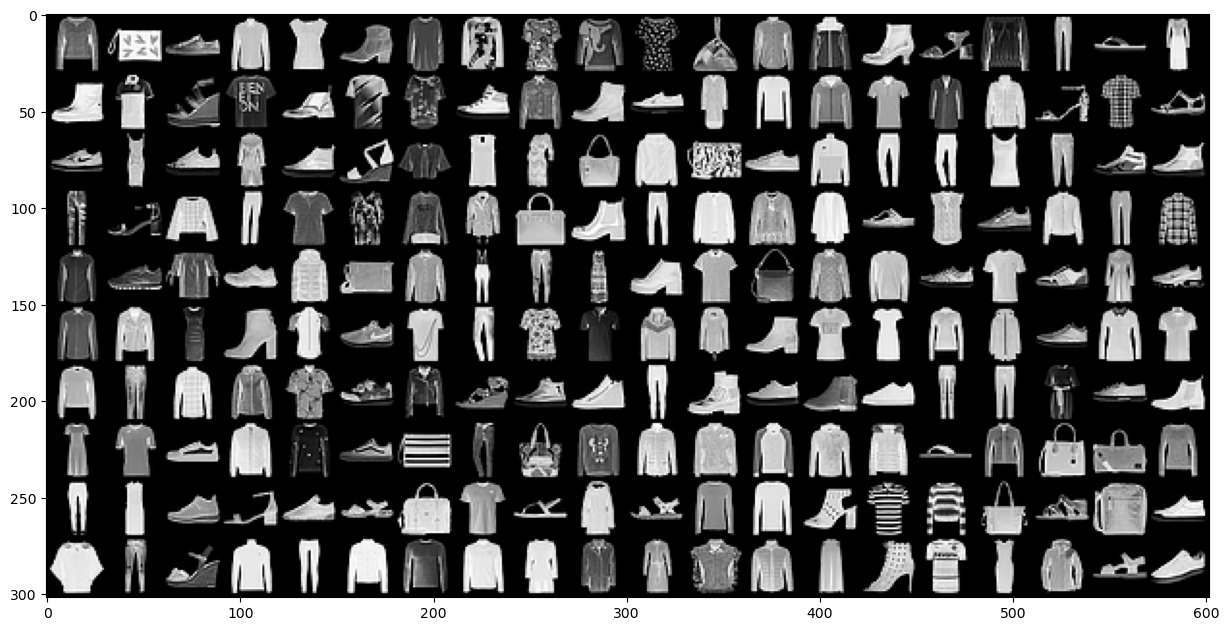

In [34]:
images, labels = next(iter(train_loader))

#used to create a grid of images
grid = torchvision.utils.make_grid(images,nrow=20)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)),cmap='gray')

[image.png](attachment:470dfdd1-f66c-459b-a214-4d86ec7e5275.png)


![image.png](attachment:470dfdd1-f66c-459b-a214-4d86ec7e5275.png)


In [38]:
class myNN(nn.Module):
    def __init__(self):
        super(myNN,self).__init__()
        self.flatten= nn.Flatten()
        self.Linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28 , 512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512,10),
        )
    def forward(self,x):

        x = self.flatten(x)
        logits = self.Linear_relu_stack(x)
        return logits 
        
    

In [39]:
model  = myNN()

In [43]:
l_r = 0.005
optimizer = torch.optim.SGD(model.parameters(),lr = l_r)
criterion  = nn.CrossEntropyLoss()

In [44]:
epochs= 15

In [46]:
losses  =[]
for i in range(epochs):
    for j,(images,targets) in enumerate(train_loader):
        y_pred = model(images)

        loss = criterion(y_pred,targets.reshape(-1))


        optimizer.zero_grad()

        loss.backward()
        optimizer.step()

    if i >10:
        optimizer.lr = 0.0005
    print(loss)
    losses.append(loss)
    
        

tensor(1.9986, grad_fn=<NllLossBackward0>)
tensor(1.4100, grad_fn=<NllLossBackward0>)
tensor(1.1043, grad_fn=<NllLossBackward0>)
tensor(0.9361, grad_fn=<NllLossBackward0>)
tensor(0.8051, grad_fn=<NllLossBackward0>)
tensor(0.8031, grad_fn=<NllLossBackward0>)
tensor(0.8077, grad_fn=<NllLossBackward0>)
tensor(0.7192, grad_fn=<NllLossBackward0>)
tensor(0.6486, grad_fn=<NllLossBackward0>)
tensor(0.5662, grad_fn=<NllLossBackward0>)
tensor(0.5940, grad_fn=<NllLossBackward0>)
tensor(0.5852, grad_fn=<NllLossBackward0>)
tensor(0.6677, grad_fn=<NllLossBackward0>)
tensor(0.5685, grad_fn=<NllLossBackward0>)
tensor(0.6610, grad_fn=<NllLossBackward0>)
